In [35]:
import yfinance as yf

In [39]:
import requests

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
tickers = ["META", "F","GE"]

In [64]:
df = pd.DataFrame()

In [67]:
for t in tickers:
    df[t] = yf.download(t,start='2021-12-17', end='2022-12-17', progress=False)["Adj Close"]

In [68]:
df

,META,F,GE
Date,,,
2021-12-17,333.790009,18.010395,70.955475
2021-12-20,325.450012,17.691544,69.876038
2021-12-21,334.200012,17.864635,72.267883
2021-12-22,330.450012,18.347462,72.275642
2021-12-23,335.239990,18.447672,72.997856
...,...,...,...
2022-12-12,114.709999,12.661779,64.834267
2022-12-13,120.150002,12.765256,64.577141
2022-12-14,121.589996,12.680593,63.539848


## Date Time index

In [69]:
from datetime import datetime

In [70]:
date = datetime(2021, 12, 1)

In [71]:
date

datetime.datetime(2021, 12, 1, 0, 0)

## Time Resampling
- Businees week etc, quarters 

In [72]:
df

,META,F,GE
Date,,,
2021-12-17,333.790009,18.010395,70.955475
2021-12-20,325.450012,17.691544,69.876038
2021-12-21,334.200012,17.864635,72.267883
2021-12-22,330.450012,18.347462,72.275642
2021-12-23,335.239990,18.447672,72.997856
...,...,...,...
2022-12-12,114.709999,12.661779,64.834267
2022-12-13,120.150002,12.765256,64.577141
2022-12-14,121.589996,12.680593,63.539848


In [73]:
# pd.to_datetime( format= "%d/%m/%Y")
## parsedates -> whene impprting CSV

In [ ]:
## Series: Resample values

In [77]:
df.resample(rule="BQ").mean()

,META,F,GE
Date,,,
2021-12-31,337.518002,18.452227,72.637532
2022-03-31,249.926292,17.380497,74.387475
2022-06-30,192.915484,12.599255,60.454606
2022-09-30,162.080000,12.977912,54.929087
2022-12-30,117.374259,12.238775,61.092398


## Time Shifting

In [78]:
df

,META,F,GE
Date,,,
2021-12-17,333.790009,18.010395,70.955475
2021-12-20,325.450012,17.691544,69.876038
2021-12-21,334.200012,17.864635,72.267883
2021-12-22,330.450012,18.347462,72.275642
2021-12-23,335.239990,18.447672,72.997856
...,...,...,...
2022-12-12,114.709999,12.661779,64.834267
2022-12-13,120.150002,12.765256,64.577141
2022-12-14,121.589996,12.680593,63.539848


In [79]:
df.head()

,META,F,GE
Date,,,
2021-12-17,333.790009,18.010395,70.955475
2021-12-20,325.450012,17.691544,69.876038
2021-12-21,334.200012,17.864635,72.267883
2021-12-22,330.450012,18.347462,72.275642
2021-12-23,335.239990,18.447672,72.997856


In [80]:
df.tail()

,META,F,GE
Date,,,
2022-12-12,114.709999,12.661779,64.834267
2022-12-13,120.150002,12.765256,64.577141
2022-12-14,121.589996,12.680593,63.539848
2022-12-15,116.150002,12.257279,61.465271
2022-12-16,119.430000,11.401245,60.560566


In [84]:
### Pushes data to number of periods you enter

In [83]:
df.shift(periods=1)

,META,F,GE
Date,,,
2021-12-17,NaN,NaN,NaN
2021-12-20,333.790009,18.010395,70.955475
2021-12-21,325.450012,17.691544,69.876038
2021-12-22,334.200012,17.864635,72.267883
2021-12-23,330.450012,18.347462,72.275642
...,...,...,...
2022-12-12,115.900002,12.398385,63.462933
2022-12-13,114.709999,12.661779,64.834267
2022-12-14,120.150002,12.765256,64.577141


## Rolling and Expanding
- Moving Average 
- More reflective in averages

In [88]:
facebook = df["META"]

<AxesSubplot:xlabel='Date'>

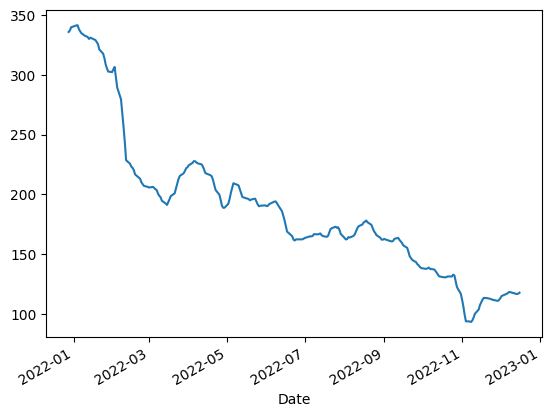

In [94]:
facebook.rolling(window=7).mean().plot()

<AxesSubplot:xlabel='Date'>

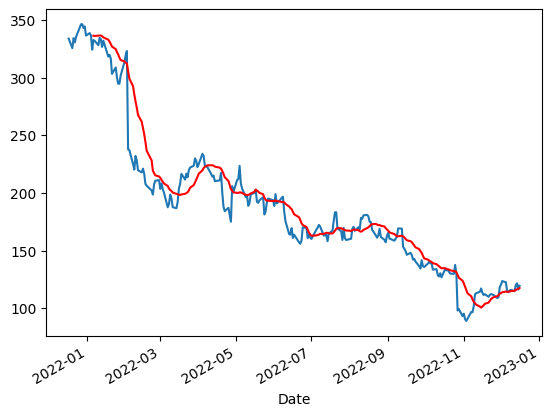

In [104]:
df["META"].plot()
df.rolling(window=14)["META"].mean().plot(c="r")

## Get Legend

In [106]:
df["META 14 day rolling"] = df.rolling(window=14)["META"].mean()

<AxesSubplot:xlabel='Date'>

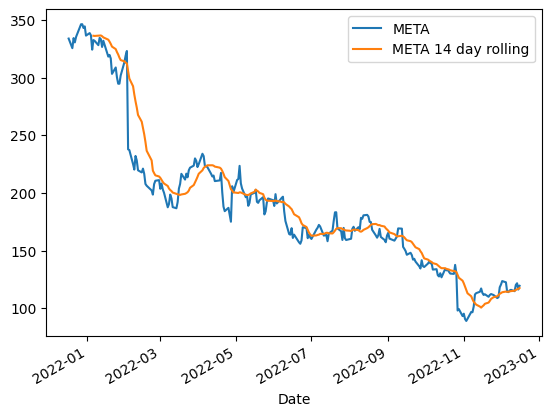

In [109]:
df[["META", "META 14 day rolling"]].plot()

## Expanding
- take in to account start to rolling point
- Each point on x is everyting that came before it
- since beginning the average price has risen

<AxesSubplot:xlabel='Date'>

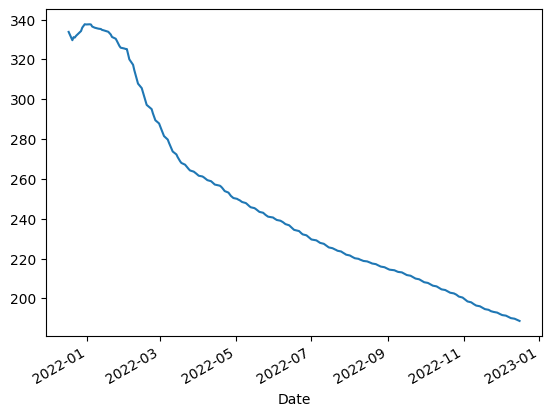

In [112]:
df["META"].expanding(min_periods=1).mean().plot()

## Bollenger band
- 20. day mean moving average used normally
- John Bollenger
- Volatility bands put above and below the moving average
- Volatili is based on the STD as volatility increases and decreases 
- band expands as volatility increases
- determine if a price movement is significant or not..pice ise high when above upper

In [115]:
## close 20day moving average
# upper 2MA + 2*std(20)
# lower 2MS - 2*std(20)
#close

In [120]:
df["20MAFB"] = df.rolling(window=20)["META"].mean()

In [122]:
df["upperMETA"] = df["20MAFB"] + 2*(df["META"].rolling(window=20).std())

In [124]:
df["lowerMETA"] = df["20MAFB"] - 2*(df["META"].rolling(window=20).std())

<AxesSubplot:xlabel='Date'>

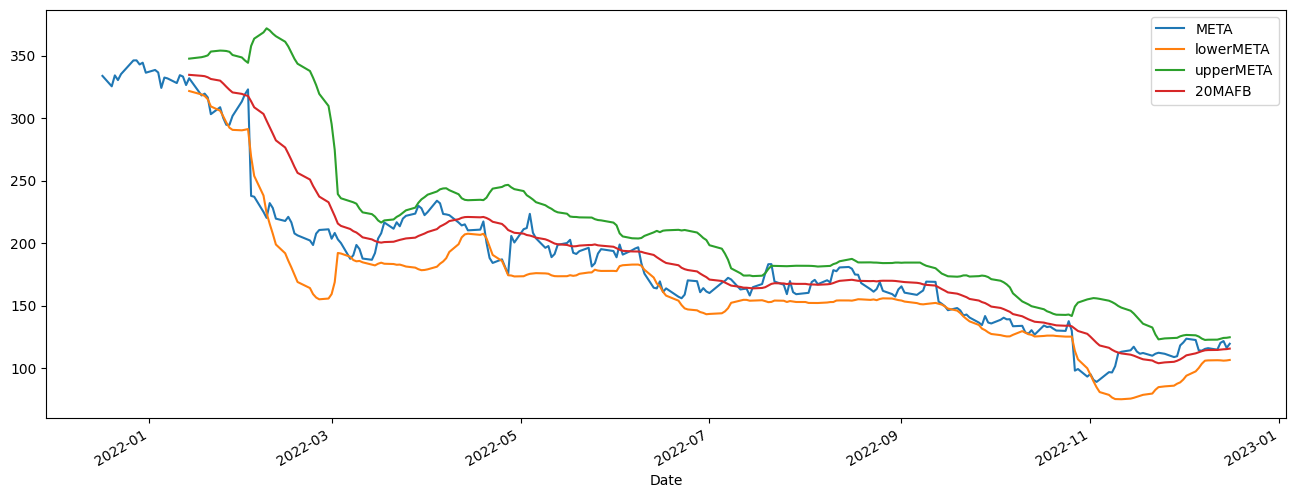

In [128]:
df[["META", "lowerMETA", "upperMETA", "20MAFB"]].plot(figsize = (16,6))

In [129]:
df

,META,F,GE,META 14 day rolling,20MAFB,upperMETA,lowerMETA
Date,,,,,,,
2021-12-17,333.790009,18.010395,70.955475,NaN,NaN,NaN,NaN
2021-12-20,325.450012,17.691544,69.876038,NaN,NaN,NaN,NaN
2021-12-21,334.200012,17.864635,72.267883,NaN,NaN,NaN,NaN
2021-12-22,330.450012,18.347462,72.275642,NaN,NaN,NaN,NaN
2021-12-23,335.239990,18.447672,72.997856,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-12-12,114.709999,12.661779,64.834267,115.127143,114.483501,122.722395,106.244607
2022-12-13,120.150002,12.765256,64.577141,115.749286,114.780001,123.397102,106.162899
2022-12-14,121.589996,12.680593,63.539848,116.417143,115.005500,124.098906,105.912095


# Normalized Return

In [132]:
for x in tickers: 
    df[f"{x} normalized return"] = df[x] /df.iloc[0][x]

In [133]:
df

,META,F,GE,META 14 day rolling,20MAFB,upperMETA,lowerMETA,META normalized return,F normalized return,GE normalized return
Date,,,,,,,,,,
2021-12-17,333.790009,18.010395,70.955475,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
2021-12-20,325.450012,17.691544,69.876038,NaN,NaN,NaN,NaN,0.975014,0.982296,0.984787
2021-12-21,334.200012,17.864635,72.267883,NaN,NaN,NaN,NaN,1.001228,0.991907,1.018496
2021-12-22,330.450012,18.347462,72.275642,NaN,NaN,NaN,NaN,0.989994,1.018715,1.018606
2021-12-23,335.239990,18.447672,72.997856,NaN,NaN,NaN,NaN,1.004344,1.024279,1.028784
...,...,...,...,...,...,...,...,...,...,...
2022-12-12,114.709999,12.661779,64.834267,115.127143,114.483501,122.722395,106.244607,0.343659,0.703026,0.913732
2022-12-13,120.150002,12.765256,64.577141,115.749286,114.780001,123.397102,106.162899,0.359957,0.708772,0.910108
2022-12-14,121.589996,12.680593,63.539848,116.417143,115.005500,124.098906,105.912095,0.364271,0.704071,0.895489


## allocation

In [134]:
allocations = [0.4,0.3,0.3]

In [135]:
list(zip(tickers, allocations))

[('META', 0.4), ('F', 0.3), ('GE', 0.3)]

In [136]:
for ticker, allocation in zip(tickers, allocations):
    df[f"{ticker} allocation"] = df[f"{x} normalized return"] * allocation

In [137]:
df

,META,F,GE,META 14 day rolling,20MAFB,upperMETA,lowerMETA,META normalized return,F normalized return,GE normalized return,META allocation,F allocation,GE allocation
Date,,,,,,,,,,,,,
2021-12-17,333.790009,18.010395,70.955475,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.400000,0.300000,0.300000
2021-12-20,325.450012,17.691544,69.876038,NaN,NaN,NaN,NaN,0.975014,0.982296,0.984787,0.393915,0.295436,0.295436
2021-12-21,334.200012,17.864635,72.267883,NaN,NaN,NaN,NaN,1.001228,0.991907,1.018496,0.407398,0.305549,0.305549
2021-12-22,330.450012,18.347462,72.275642,NaN,NaN,NaN,NaN,0.989994,1.018715,1.018606,0.407442,0.305582,0.305582
2021-12-23,335.239990,18.447672,72.997856,NaN,NaN,NaN,NaN,1.004344,1.024279,1.028784,0.411514,0.308635,0.308635
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,114.709999,12.661779,64.834267,115.127143,114.483501,122.722395,106.244607,0.343659,0.703026,0.913732,0.365493,0.274120,0.274120
2022-12-13,120.150002,12.765256,64.577141,115.749286,114.780001,123.397102,106.162899,0.359957,0.708772,0.910108,0.364043,0.273032,0.273032
2022-12-14,121.589996,12.680593,63.539848,116.417143,115.005500,124.098906,105.912095,0.364271,0.704071,0.895489,0.358196,0.268647,0.268647


## Position Value
- 200000 in vested

In [138]:
for x in tickers:
    df[f"{x} position value"] = df[f"{x} allocation"] * 200000

In [139]:
df

,META,F,GE,META 14 day rolling,20MAFB,upperMETA,lowerMETA,META normalized return,F normalized return,GE normalized return,META allocation,F allocation,GE allocation,META position value,F position value,GE position value
Date,,,,,,,,,,,,,,,,
2021-12-17,333.790009,18.010395,70.955475,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.400000,0.300000,0.300000,80000.000000,60000.000000,60000.000000
2021-12-20,325.450012,17.691544,69.876038,NaN,NaN,NaN,NaN,0.975014,0.982296,0.984787,0.393915,0.295436,0.295436,78782.969452,59087.227089,59087.227089
2021-12-21,334.200012,17.864635,72.267883,NaN,NaN,NaN,NaN,1.001228,0.991907,1.018496,0.407398,0.305549,0.305549,81479.698022,61109.773516,61109.773516
2021-12-22,330.450012,18.347462,72.275642,NaN,NaN,NaN,NaN,0.989994,1.018715,1.018606,0.407442,0.305582,0.305582,81488.446149,61116.334612,61116.334612
2021-12-23,335.239990,18.447672,72.997856,NaN,NaN,NaN,NaN,1.004344,1.024279,1.028784,0.411514,0.308635,0.308635,82302.718758,61727.039069,61727.039069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,114.709999,12.661779,64.834267,115.127143,114.483501,122.722395,106.244607,0.343659,0.703026,0.913732,0.365493,0.274120,0.274120,73098.536000,54823.902000,54823.902000
2022-12-13,120.150002,12.765256,64.577141,115.749286,114.780001,123.397102,106.162899,0.359957,0.708772,0.910108,0.364043,0.273032,0.273032,72808.634927,54606.476195,54606.476195
2022-12-14,121.589996,12.680593,63.539848,116.417143,115.005500,124.098906,105.912095,0.364271,0.704071,0.895489,0.358196,0.268647,0.268647,71639.121248,53729.340936,53729.340936


### Calculating total Positon

In [142]:
df["total Position"] = df[["META position value", "F position value" , "GE position value"]].sum(axis=1)

In [143]:
df

,META,F,GE,META 14 day rolling,20MAFB,upperMETA,lowerMETA,META normalized return,F normalized return,GE normalized return,META allocation,F allocation,GE allocation,META position value,F position value,GE position value,total Position
Date,,,,,,,,,,,,,,,,,
2021-12-17,333.790009,18.010395,70.955475,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.400000,0.300000,0.300000,80000.000000,60000.000000,60000.000000,200000.000000
2021-12-20,325.450012,17.691544,69.876038,NaN,NaN,NaN,NaN,0.975014,0.982296,0.984787,0.393915,0.295436,0.295436,78782.969452,59087.227089,59087.227089,196957.423629
2021-12-21,334.200012,17.864635,72.267883,NaN,NaN,NaN,NaN,1.001228,0.991907,1.018496,0.407398,0.305549,0.305549,81479.698022,61109.773516,61109.773516,203699.245055
2021-12-22,330.450012,18.347462,72.275642,NaN,NaN,NaN,NaN,0.989994,1.018715,1.018606,0.407442,0.305582,0.305582,81488.446149,61116.334612,61116.334612,203721.115373
2021-12-23,335.239990,18.447672,72.997856,NaN,NaN,NaN,NaN,1.004344,1.024279,1.028784,0.411514,0.308635,0.308635,82302.718758,61727.039069,61727.039069,205756.796895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,114.709999,12.661779,64.834267,115.127143,114.483501,122.722395,106.244607,0.343659,0.703026,0.913732,0.365493,0.274120,0.274120,73098.536000,54823.902000,54823.902000,182746.340001
2022-12-13,120.150002,12.765256,64.577141,115.749286,114.780001,123.397102,106.162899,0.359957,0.708772,0.910108,0.364043,0.273032,0.273032,72808.634927,54606.476195,54606.476195,182021.587316
2022-12-14,121.589996,12.680593,63.539848,116.417143,115.005500,124.098906,105.912095,0.364271,0.704071,0.895489,0.358196,0.268647,0.268647,71639.121248,53729.340936,53729.340936,179097.803119


<AxesSubplot:xlabel='Date'>

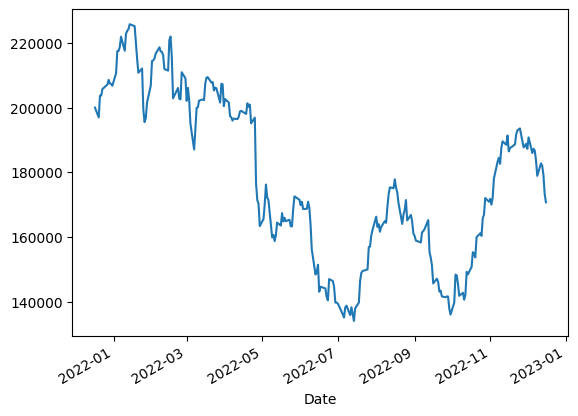

In [144]:
df["total Position"].plot()

In [146]:
df["port daily return"] = df["total Position"].pct_change()

In [147]:
df

,META,F,GE,META 14 day rolling,20MAFB,upperMETA,lowerMETA,META normalized return,F normalized return,GE normalized return,META allocation,F allocation,GE allocation,META position value,F position value,GE position value,total Position,port daily return
Date,,,,,,,,,,,,,,,,,,
2021-12-17,333.790009,18.010395,70.955475,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.400000,0.300000,0.300000,80000.000000,60000.000000,60000.000000,200000.000000,NaN
2021-12-20,325.450012,17.691544,69.876038,NaN,NaN,NaN,NaN,0.975014,0.982296,0.984787,0.393915,0.295436,0.295436,78782.969452,59087.227089,59087.227089,196957.423629,-0.015213
2021-12-21,334.200012,17.864635,72.267883,NaN,NaN,NaN,NaN,1.001228,0.991907,1.018496,0.407398,0.305549,0.305549,81479.698022,61109.773516,61109.773516,203699.245055,0.034230
2021-12-22,330.450012,18.347462,72.275642,NaN,NaN,NaN,NaN,0.989994,1.018715,1.018606,0.407442,0.305582,0.305582,81488.446149,61116.334612,61116.334612,203721.115373,0.000107
2021-12-23,335.239990,18.447672,72.997856,NaN,NaN,NaN,NaN,1.004344,1.024279,1.028784,0.411514,0.308635,0.308635,82302.718758,61727.039069,61727.039069,205756.796895,0.009992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-12,114.709999,12.661779,64.834267,115.127143,114.483501,122.722395,106.244607,0.343659,0.703026,0.913732,0.365493,0.274120,0.274120,73098.536000,54823.902000,54823.902000,182746.340001,0.021608
2022-12-13,120.150002,12.765256,64.577141,115.749286,114.780001,123.397102,106.162899,0.359957,0.708772,0.910108,0.364043,0.273032,0.273032,72808.634927,54606.476195,54606.476195,182021.587316,-0.003966
2022-12-14,121.589996,12.680593,63.539848,116.417143,115.005500,124.098906,105.912095,0.364271,0.704071,0.895489,0.358196,0.268647,0.268647,71639.121248,53729.340936,53729.340936,179097.803119,-0.016063


In [148]:
df["port daily return"].mean()

-0.00039018568640573323

In [149]:
df["port daily return"].std()

0.02188059649221678

<AxesSubplot:ylabel='Frequency'>

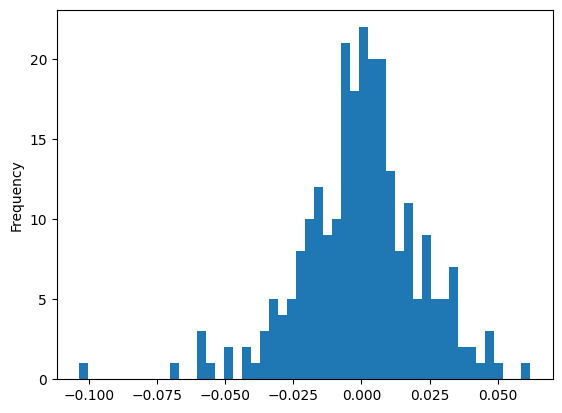

In [151]:
df["port daily return"].plot(kind = 'hist', bins = 50)

## cumulativeReturn

In [152]:
cumulative = 100 * (df["total Position"][-1] / df["total Position"][0] - 1)

In [153]:
cumulative

-14.64990393833473

In [154]:
df["total Position"][-1]

170700.19212333055

## Sharp Ratio